In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON lines file
df = pd.read_json('logs/activities.jsonl', lines=True)

# Convert the datetime column to a datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Assuming each record represents a fixed interval of time, e.g., 5 seconds
df['time_spent'] = 2  # Adjust this value based on your actual data interval

# Group by application and sum the time spent
app_usage = df.groupby('application')['time_spent'].sum().reset_index()

# Sort by time spent in descending order
app_usage = app_usage.sort_values(by='time_spent', ascending=False)

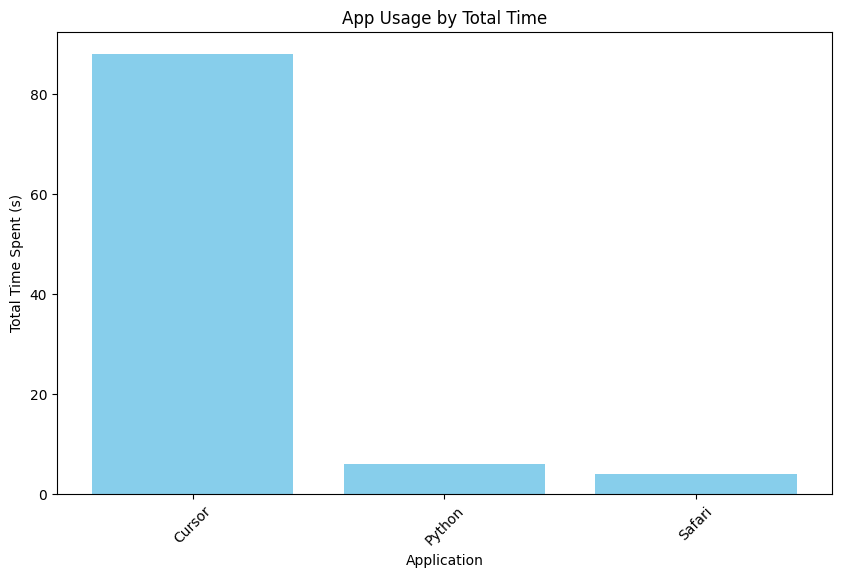

In [8]:

app_usage = df.groupby('application')['time_spent'].sum().reset_index().sort_values(by='time_spent', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(app_usage['application'], app_usage['time_spent'], color='skyblue')
plt.xlabel('Application')
plt.ylabel('Total Time Spent (s)')
plt.title('App Usage by Total Time')
plt.xticks(rotation=45)
plt.show()

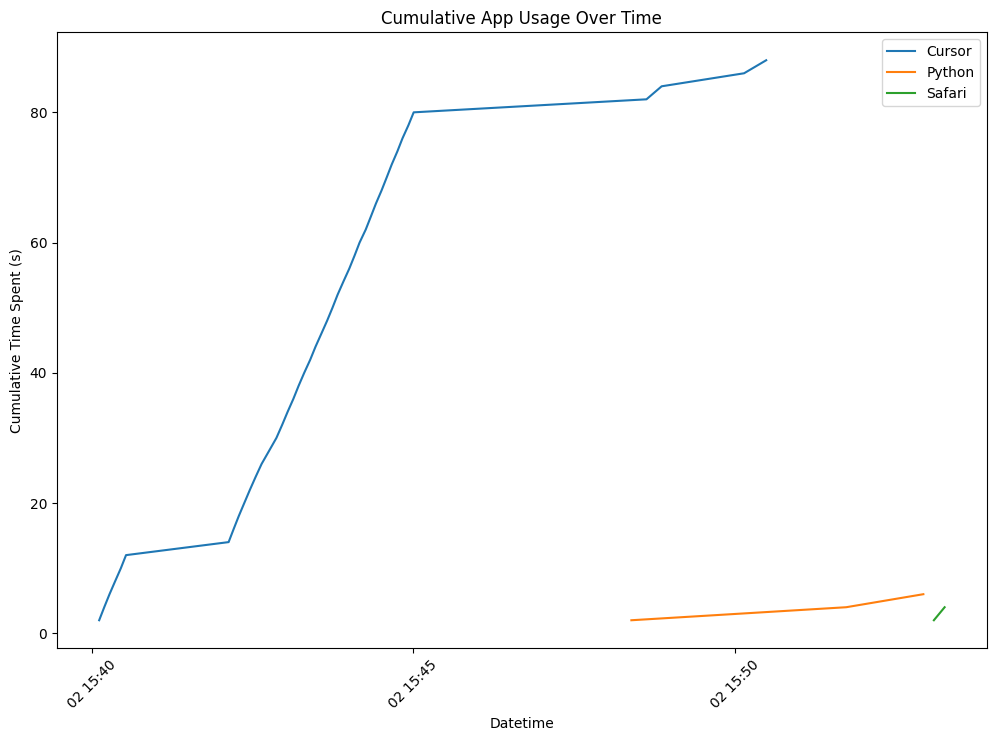

In [9]:
# Create a new DataFrame for cumulative calculations
cumulative_df = df.sort_values(by='datetime').copy()

# Calculate cumulative time spent for each application
cumulative_df['cumulative_time'] = cumulative_df.groupby('application')['time_spent'].cumsum()

# Plotting
plt.figure(figsize=(12, 8))

# Get a list of unique applications
applications = cumulative_df['application'].unique()

for app in applications:
    # Filter the DataFrame for each application
    app_df = cumulative_df[cumulative_df['application'] == app]

    # Plotting each application's cumulative time
    plt.plot(app_df['datetime'], app_df['cumulative_time'], label=app)

plt.xlabel('Datetime')
plt.ylabel('Cumulative Time Spent (s)')
plt.title('Cumulative App Usage Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [10]:
from IPython.display import HTML

# Function to make URLs into clickable links
def make_clickable(val):
    return f'<a target="_blank" href="{val}">View Screenshot</a>'

# Apply the function to the screenshot_url column
df['image_path'] = df['image_path'].apply(make_clickable)

In [11]:
# Select the columns to display
display_df = df[['application', 'activity', 'image_path', 'is_productive']]

# Convert the DataFrame to HTML and allow HTML rendering
HTML(display_df.to_html(escape=False))

,application,activity,image_path,is_productive
0,Cursor,Computer screen showing a programming error with highlighted syntax.,View Screenshot,NaN
1,Cursor,Screen displaying a code editor with error message.,View Screenshot,NaN
2,Cursor,"The screen displays a computer program or code, with an error message indicating that the code is causing problems.",View Screenshot,NaN
3,Cursor,"The computer screen displays a programming interface with code written in Python. There is an error message indicating that a variable named `url` has not been defined, which is causing the program to fail at that point.",View Screenshot,NaN
4,Cursor,"The computer screen displays a coding error with an open source software interface. There's a pop-up window showing a line of code with errors indicated by red marks and text in parentheses, highlighting the issue.",View Screenshot,NaN
5,Cursor,Computer screen showing an open code editor with a syntax error highlighted.,View Screenshot,NaN
6,Cursor,"The computer screen displays a software interface with an error message, indicating that there is an issue with the application's functionality.",View Screenshot,NaN
7,Cursor,Error message in programming environment.,View Screenshot,NaN
8,Cursor,The computer screen is displaying a programming code error message.,View Screenshot,NaN
9,Cursor,"The image shows a computer screen with a code editor open, displaying HTML and CSS code. There is a screenshot of the code within another window on the same screen.",View Screenshot,NaN
